In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
from PIL import Image
import numpy as np
path1=("/content/drive/MyDrive/archive.zip")
path2=("/content/drive/MyDrive/024.butterfly.zip")

def import_imgs(path):
  data_matrix = np.empty((0, 10304), np.int8)
  zip_read=zipfile.ZipFile(path,mode='r')
  name = zip_read.namelist()
  pgm_imgs=name[1:]
  for pgm_img in pgm_imgs:
    myfile = zip_read.open(pgm_img)
    img = Image.open(myfile).convert('L')
    new_image = img.resize((92, 112))
    image_sequence= new_image.getdata()
    image_array = np.array(image_sequence)
    data_matrix = np.vstack([data_matrix,image_array])
  return data_matrix


data_faces=import_imgs(path1)
data_nonfaces=import_imgs(path2)


In [ ]:
data1=np.vstack([data_faces[:200:],data_nonfaces[:200:]])
data2=np.vstack([data_faces[:200:],data_nonfaces[:300:]])
data3=np.vstack([data_faces[:200:],data_nonfaces[:400:]])
label_faces=np.repeat("faces",200)
labels1=np.append(label_faces,np.repeat("nonfaces",200))
labels2=np.append(label_faces,np.repeat("nonfaces",300))
labels3=np.append(label_faces,np.repeat("nonfaces",400))

print(labels1.shape,data1.shape)
print(labels2.shape,data2.shape)
print(labels3.shape,data3.shape)

(400,) (400, 10304)
(500,) (500, 10304)
(600,) (600, 10304)


In [ ]:
from sklearn.preprocessing import normalize
data_matrix1=normalize(data1)
data_matrix2=normalize(data2)
data_matrix3=normalize(data3)

In [ ]:
def splitdata(data_matrix,labels):
  train_data,test_data=np.array(data_matrix[::2]),np.array(data_matrix[1::2])
  train_label,test_label=np.array(labels[::2]),np.array(labels[1::2])
  return train_data,test_data,train_label,test_label
train_data1,test_data1,train_label1,test_label1=splitdata(data_matrix1,labels1)
train_data2,test_data2,train_label2,test_label2=splitdata(data_matrix2,labels2)
train_data3,test_data3,train_label3,test_label3=splitdata(data_matrix3,labels3)
print(train_data1.shape,train_label1.shape)
print(train_data2.shape,train_label2.shape)
print(train_data3.shape,train_label3.shape)

(200, 10304) (200,)
(250, 10304) (250,)
(300, 10304) (300,)


In [ ]:
def Evaluate_CovMatrix(train_data,test_data):
  train_mean = np.mean(train_data,axis=0)
  print(train_mean.shape)
  train_centered=train_data-train_mean
  test_mean = np.mean(test_data,axis=0)
  print(test_mean.shape)
  test_centered=test_data-test_mean
  print(type(test_centered[0]))
  Cov_matrix=np.cov(train_centered, rowvar=False, bias=True)
  print(Cov_matrix)
  eignvalues,eignvectors=np.linalg.eigh(Cov_matrix)
  print(eignvalues)
  return Cov_matrix,eignvalues,eignvectors,train_centered,test_centered

Cov_matrix1,eignvalues1,eignvectors1,train_centered1,test_centered1=Evaluate_CovMatrix(train_data1,test_data1)
Cov_matrix2,eignvalues2,eignvectors2,train_centered2,test_centered2=Evaluate_CovMatrix(train_data2,test_data2)
Cov_matrix3,eignvalues3,eignvectors3,train_centered3,test_centered3=Evaluate_CovMatrix(train_data3,test_data3)
print(Cov_matrix1.shape)

(10304,)
(10304,)
<class 'numpy.ndarray'>
[[1.81278659e-05 1.70196383e-05 1.45576625e-05 ... 5.77305976e-06
  6.69262682e-06 7.15867481e-06]
 [1.70196383e-05 1.76480565e-05 1.52099780e-05 ... 5.22456122e-06
  6.20874781e-06 6.54048383e-06]
 [1.45576625e-05 1.52099780e-05 1.61655898e-05 ... 5.95645615e-06
  6.85433716e-06 7.21995809e-06]
 ...
 [5.77305976e-06 5.22456122e-06 5.95645615e-06 ... 2.78552240e-05
  2.46431557e-05 2.39722005e-05]
 [6.69262682e-06 6.20874781e-06 6.85433716e-06 ... 2.46431557e-05
  2.47585298e-05 2.42587962e-05]
 [7.15867481e-06 6.54048383e-06 7.21995809e-06 ... 2.39722005e-05
  2.42587962e-05 2.50496036e-05]]
[-1.46140972e-17 -1.01160522e-17 -9.16761223e-18 ...  8.73390787e-03
  1.43144576e-02  3.06560116e-02]
(10304,)
(10304,)
<class 'numpy.ndarray'>
[[2.58104905e-05 2.35502634e-05 2.17478897e-05 ... 8.44874375e-06
  9.21103348e-06 1.07201084e-05]
 [2.35502634e-05 2.31827562e-05 2.13782643e-05 ... 8.08597474e-06
  8.95097758e-06 1.00903889e-05]
 [2.17478897e-0

In [ ]:
def sort(eignvalues,eignvectors):
  sortedindeces= np.argsort(eignvalues)
  sorted_eignvectors=eignvectors[:,sortedindeces]
  sorted_eignvalues=np.sort(eignvalues)
  sum_eignvalues=np.sum(sorted_eignvalues)
  return sum_eignvalues,sorted_eignvalues,sorted_eignvectors

sum_eignvalues1,sorted_eignvalues1,sorted_eignvectors1=sort(eignvalues1,eignvectors1)
print('sum of 50% eignvalues for 200faces and 200 non faces',sum_eignvalues1)
sum_eignvalues2,sorted_eignvalues2,sorted_eignvectors2=sort(eignvalues2,eignvectors2)
print('sum of 50% eignvalues for 200faces and 300 non faces',sum_eignvalues2)
sum_eignvalues3,sorted_eignvalues3,sorted_eignvectors3=sort(eignvalues3,eignvectors3)
print('sum of 50% eignvalues for 200faces and 400 non faces',sum_eignvalues3)



sum of 50% eignvalues for 200faces and 200 non faces 0.15896360214388516
sum of 50% eignvalues for 200faces and 300 non faces 0.18311152297816582
sum of 50% eignvalues for 200faces and 400 non faces 0.19165593454318003


In [ ]:
def PCA(alpha,sorted_eignvalues,sum_eignvalues):
  accumulated_eignvalues=0
  for eignvalue in sorted_eignvalues:
    accumulated_eignvalues=accumulated_eignvalues+eignvalue
    fraction_totall_variance=accumulated_eignvalues/sum_eignvalues
    if fraction_totall_variance >= float(alpha):
      print(fraction_totall_variance)
      index=int(np.where(sorted_eignvalues==eignvalue)[0])
      break
  return index;

def compute_EV(sorted_eignvalues,sum_eignvalues,sorted_eignvectors):
  alpha1_dim=PCA(0.8,sorted_eignvalues,sum_eignvalues)
  print("alpha1 dim",alpha1_dim)
  alpha1_EV=sorted_eignvectors[:,0:alpha1_dim]

  alpha2_dim=PCA(0.85,sorted_eignvalues,sum_eignvalues)
  print("alpha1=2 dim",alpha2_dim)
  alpha2_EV=sorted_eignvectors[:,0:alpha2_dim]

  alpha3_dim=PCA(0.9,sorted_eignvalues,sum_eignvalues)
  print("alpha3 dim",alpha3_dim)
  alpha3_EV=sorted_eignvectors[:,0:alpha3_dim]

  alpha4_dim=PCA(0.95,sorted_eignvalues,sum_eignvalues)
  print("alpha4 dim",alpha4_dim)
  alpha4_EV=sorted_eignvectors[:,0:alpha4_dim]
  return alpha1_EV,alpha2_EV,alpha3_EV,alpha4_EV

alpha1_EV1,alpha2_EV1,alpha3_EV1,alpha4_EV1=compute_EV(sorted_eignvalues1,sum_eignvalues1,sorted_eignvectors1)
alpha1_EV2,alpha2_EV2,alpha3_EV2,alpha4_EV2=compute_EV(sorted_eignvalues2,sum_eignvalues2,sorted_eignvectors2)
alpha1_EV3,alpha2_EV3,alpha3_EV3,alpha4_EV3=compute_EV(sorted_eignvalues3,sum_eignvalues3,sorted_eignvectors3)

0.8071507488108186
alpha1 dim 10302
1.0000000000000002
alpha1=2 dim 10303
1.0000000000000002
alpha3 dim 10303
1.0000000000000002
alpha4 dim 10303
0.9999999999999999
alpha1 dim 10303
0.9999999999999999
alpha1=2 dim 10303
0.9999999999999999
alpha3 dim 10303
0.9999999999999999
alpha4 dim 10303
0.8036552708622592
alpha1 dim 10302
0.9999999999999997
alpha1=2 dim 10303
0.9999999999999997
alpha3 dim 10303
0.9999999999999997
alpha4 dim 10303


In [ ]:
def DataProjected (eignvector,test,train):
  test_data_projected=np.dot(eignvector.T,test.T).T
  train_data_projected=np.dot(eignvector.T,train.T).T
  return test_data_projected,train_data_projected;

In [ ]:
TestAlpha11,TrainAlpha11=DataProjected(alpha1_EV1,test_centered1,train_centered1)
TestAlpha12,TrainAlpha12=DataProjected(alpha2_EV1,test_centered1,train_centered1)
TestAlpha13,TrainAlpha13=DataProjected(alpha3_EV1,test_centered1,train_centered1)
TestAlpha14,TrainAlpha14=DataProjected(alpha4_EV1,test_centered1,train_centered1)


TestAlpha21,TrainAlpha21=DataProjected(alpha1_EV2,test_centered2,train_centered2)
TestAlpha22,TrainAlpha22=DataProjected(alpha2_EV2,test_centered2,train_centered2)
TestAlpha23,TrainAlpha23=DataProjected(alpha3_EV2,test_centered2,train_centered2)
TestAlpha24,TrainAlpha24=DataProjected(alpha4_EV2,test_centered2,train_centered2)

TestAlpha31,TrainAlpha31=DataProjected(alpha1_EV3,test_centered3,train_centered3)
TestAlpha32,TrainAlpha32=DataProjected(alpha2_EV3,test_centered3,train_centered3)
TestAlpha33,TrainAlpha33=DataProjected(alpha3_EV3,test_centered3,train_centered3)
TestAlpha34,TrainAlpha34=DataProjected(alpha4_EV3,test_centered3,train_centered3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
def knn(TestAlpha,TrainAlpha,test_label,train_label):
  k_values=np.array([1,3,5,7])
  error_rate = np.empty(len(k_values))
  accuracy = np.empty(len(k_values))
  pred =np.empty(len(k_values))
  
  for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(TrainAlpha,train_label)
    pred=knn.predict(TestAlpha)
    accuracy[i]=knn.score(TestAlpha, test_label)
    error_rate[i]=np.mean(pred != test_label)
    print('\n')
    print(confusion_matrix(test_label,pred))
    print('\n')
    print(classification_report(test_label,pred))
  return error_rate,accuracy;


In [ ]:
k_values=np.array([1,3,5,7])
print("accuracy for 200 faces and 200 non faces ")
Alpha11_ErrorRate,Alpha11_accuracy=knn(TestAlpha11,TrainAlpha11,test_label1,train_label1)
print("Alpha 1 Accuracy",Alpha11_accuracy)
Alpha12_ErrorRate,Alpha12_accuracy=knn(TestAlpha12,TrainAlpha12,test_label1,train_label1)
print("Alpha 2 Accuracy",Alpha12_accuracy)
Alpha13_ErrorRate,Alpha13_accuracy=knn(TestAlpha13,TrainAlpha13,test_label1,train_label1)
print("Alpha 3 Accuracy",Alpha13_accuracy)
Alpha14_ErrorRate,Alpha14_accuracy=knn(TestAlpha14,TrainAlpha14,test_label1,train_label1)
print("Alpha 4 Accuracy",Alpha14_accuracy)
#choosen max accuracy for each alpha
accuracy_1=np.array([np.max(Alpha11_accuracy),np.max(Alpha12_accuracy),np.max(Alpha13_accuracy),np.max(Alpha14_accuracy)])
print ("max accuracy for each alpha",accuracy_1)
accuracy_1_best=np.array(np.max(accuracy_1))
print ("best accuracy for first case:",accuracy_1_best)

accuracy for 200 faces and 200 non faces 


[[91  9]
 [ 7 93]]


              precision    recall  f1-score   support

       faces       0.93      0.91      0.92       100
    nonfaces       0.91      0.93      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



[[80 20]
 [ 4 96]]


              precision    recall  f1-score   support

       faces       0.95      0.80      0.87       100
    nonfaces       0.83      0.96      0.89       100

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



[[57 43]
 [ 1 99]]


              precision    recall  f1-score   support

       faces       0.98      0.57      0.72       100
    nonfaces       0.70      0.99      0.82       100

    accuracy                           0.78       200
   macro avg     

In [ ]:
print("accuracy for 200 faces 350 non faces")
Alpha21_ErrorRate,Alpha21_accuracy=knn(TestAlpha21,TrainAlpha21,test_label2,train_label2)
print("Alpha 1 Accuracy",Alpha21_accuracy)
Alpha22_ErrorRate,Alpha22_accuracy=knn(TestAlpha22,TrainAlpha22,test_label2,train_label2)
print("Alpha 2 Accuracy",Alpha22_accuracy)
Alpha23_ErrorRate,Alpha23_accuracy=knn(TestAlpha23,TrainAlpha23,test_label2,train_label2)
print("Alpha 3 Accuracy",Alpha23_accuracy)
Alpha24_ErrorRate,Alpha24_accuracy=knn(TestAlpha24,TrainAlpha24,test_label2,train_label2)
print("Alpha 4 Accuracy",Alpha24_accuracy)
print()
accuracy_2=np.array([np.max(Alpha21_accuracy),np.max(Alpha22_accuracy),np.max(Alpha23_accuracy),np.max(Alpha24_accuracy)])
print ("max accuracy for each alpha",accuracy_2)
accuracy_2_best=np.array(np.max(accuracy_2))
print ("best accuracy for first case:",accuracy_2_best)

accuracy for 200 faces 350 non faces
Alpha 1 Accuracy [0.944 0.904 0.84  0.788]
Alpha 2 Accuracy [0.944 0.904 0.84  0.788]
Alpha 3 Accuracy [0.944 0.904 0.84  0.788]
Alpha 4 Accuracy [0.944 0.904 0.84  0.788]

max accuracy for each alpha [0.944 0.944 0.944 0.944]
best accuracy for first case: 0.944


In [ ]:
print("accuracy for 200 faces 400 non faces")
Alpha31_ErrorRate,Alpha31_accuracy=knn(TestAlpha31,TrainAlpha31,test_label3,train_label3)
print("Alpha 1 Accuracy",Alpha31_accuracy)
Alpha32_ErrorRate,Alpha32_accuracy=knn(TestAlpha32,TrainAlpha32,test_label3,train_label3)
print("Alpha 2 Accuracy",Alpha32_accuracy)
Alpha33_ErrorRate,Alpha33_accuracy=knn(TestAlpha33,TrainAlpha33,test_label3,train_label3)
print("Alpha 3 Accuracy",Alpha33_accuracy)
Alpha34_ErrorRate,Alpha34_accuracy=knn(TestAlpha34,TrainAlpha34,test_label3,train_label3)
print("Alpha 4 Accuracy",Alpha34_accuracy)
accuracy_3=np.array([np.max(Alpha31_accuracy),np.max(Alpha32_accuracy),np.max(Alpha33_accuracy),np.max(Alpha34_accuracy)])
print ("max accuracy for each alpha",accuracy_3)
accuracy_3_best=np.array(np.max(accuracy_3))
print ("best accuracy for first case:",accuracy_3_best)

accuracy for 200 faces 400 non faces
Alpha 1 Accuracy [0.94       0.93       0.87       0.84666667]
Alpha 2 Accuracy [0.95666667 0.92333333 0.86666667 0.83      ]
Alpha 3 Accuracy [0.95666667 0.92333333 0.86666667 0.83      ]
Alpha 4 Accuracy [0.95666667 0.92333333 0.86666667 0.83      ]
max accuracy for each alpha [0.94       0.95666667 0.95666667 0.95666667]
best accuracy for first case: 0.9566666666666667


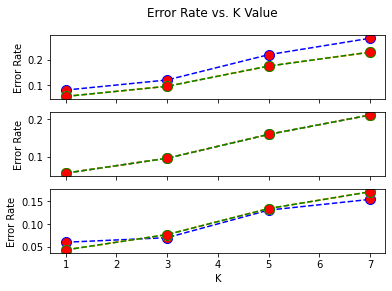

In [ ]:
fig, axs = plt.subplots(3)
axs[0].plot(k_values,Alpha11_ErrorRate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].plot(k_values,Alpha12_ErrorRate,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].plot(k_values,Alpha13_ErrorRate,color='yellow', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].plot(k_values,Alpha14_ErrorRate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
# axs[0, 0].set_title('Axis [0, 0]')
axs[1].plot(k_values,Alpha21_ErrorRate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot(k_values,Alpha22_ErrorRate,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot(k_values,Alpha23_ErrorRate,color='yellow', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot(k_values,Alpha24_ErrorRate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
# axs[0, 1].set_title('Axis [0, 1]')
axs[2].plot(k_values,Alpha31_ErrorRate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[2].plot(k_values,Alpha32_ErrorRate,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[2].plot(k_values,Alpha33_ErrorRate,color='yellow', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[2].plot(k_values,Alpha34_ErrorRate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
fig.suptitle('Error Rate vs. K Value')
for ax in axs.flat:
    ax.set(xlabel='K', ylabel='Error Rate')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

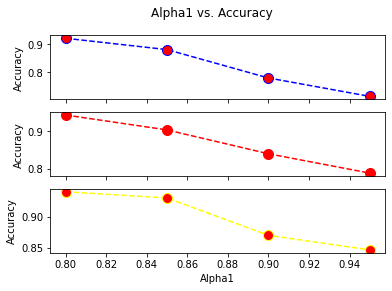

In [ ]:
# accuracy vs per alpha values
fig, axs = plt.subplots(3)
axs[0].plot([0.8,0.85,0.9,0.95],Alpha11_accuracy,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot([0.8,0.85,0.9,0.95],Alpha21_accuracy,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[2].plot([0.8,0.85,0.9,0.95],Alpha31_accuracy,color='yellow', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
fig.suptitle('Alpha1 vs. Accuracy')
for ax in axs.flat:
    ax.set(xlabel='Alpha1', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


<function matplotlib.pyplot.show>

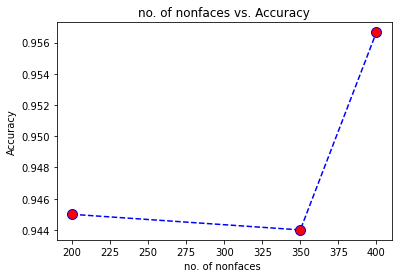

In [ ]:
# number of nonfaces vs accurcay 
plt.plot([200,350,400],[accuracy_1_best,accuracy_2_best,accuracy_3_best],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('no. of nonfaces vs. Accuracy')
plt.xlabel('no. of nonfaces ')
plt.ylabel('Accuracy')
plt.show
